In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os


In [72]:
def graficar_sdi_reciente(estacion_id, escalas=[3, 6], meses_atras=18):
    estacion_code = int(estacion_id)/10
    plt.figure(figsize=(12, 7))
    colores_lineas = {3: 'black', 6: 'blue', 12: 'green'}
    
    # Dibujar bandas de severidad (Fondo)
    plt.axhspan(0, -1, color='#ffff01', alpha=1.0, label='Sequía leve')
    plt.axhspan(-1, -1.5, color='#e69800', alpha=1.0, label='Sequía moderada')
    plt.axhspan(-1.5, -2, color='#e50100', alpha=1.0, label='Sequía severa')
    plt.axhspan(-2, -4, color='#730000', alpha=1.0, label='Sequía extrema')

    max_fecha = None
    min_fecha_plot = None

    for k in escalas:
        filepath = f"d:/GitHub/Sala_Situacion_Dinagua/Status_Outlook_Bulletin/stations/output_sdi/csv/{k}month_CompleteSDI_{estacion_id}.txt"
        if not os.path.exists(filepath):
            continue
            
        df = pd.read_csv(filepath)
        df['Fecha'] = pd.to_datetime(df['Fecha'])
        # cambiar dia a 1 para evitar problemas de formato en el eje x
        df['Fecha'] = df['Fecha'].apply(lambda x: x.replace(day=1))
        
        # --- FILTRAR ÚLTIMOS MESES ---
        # Determinamos la última fecha disponible en los datos
        if max_fecha is None:
            max_fecha = df['Fecha'].max()
            # Restamos aproximadamente 18 meses (18 * 30.5 días)
            min_fecha_plot = max_fecha - pd.DateOffset(months=meses_atras)
        
        # Filtramos el dataframe para el periodo deseado
        df_filtered = df[df['Fecha'] >= min_fecha_plot]
        
        # Graficar línea con datos filtrados
        plt.plot(df_filtered['Fecha'], df_filtered['GammaSDI'], 
                 label=f'SDI-{k}', 
                 color=colores_lineas.get(k, 'red'), 
                 linewidth=2, marker='o', markersize=4) # Agregamos puntos para mejor visualización

    # Estética y Formato
    plt.axhline(0, color='white', linewidth=2)
    # plt.title(f"Estación {estacion_code} - Últimos {meses_atras} meses", fontsize=12)
    plt.ylabel("SDI", fontsize=18)
    plt.xlabel("Fecha", fontsize=18)
    plt.ylim(-4, 4) 

    # Configurar el eje X para mostrar cada mes
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # Un tick por cada mes
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    
    # Leyenda inteligente
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right', title="")
    
    plt.grid(True, alpha=0.2, linestyle='--')
    plt.tight_layout()
    
    # Guardar y mostrar
    plt.savefig(f"d:/GitHub/Sala_Situacion_Dinagua/Status_Outlook_Bulletin/stations/output_sdi/svg/SDI_{estacion_id}.svg", dpi=300)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'd:/GitHub/Sala_Situacion_Dinagua/Status_Outlook_Bulletin/stations/output_sdi/svg/SDI_1330.svg'

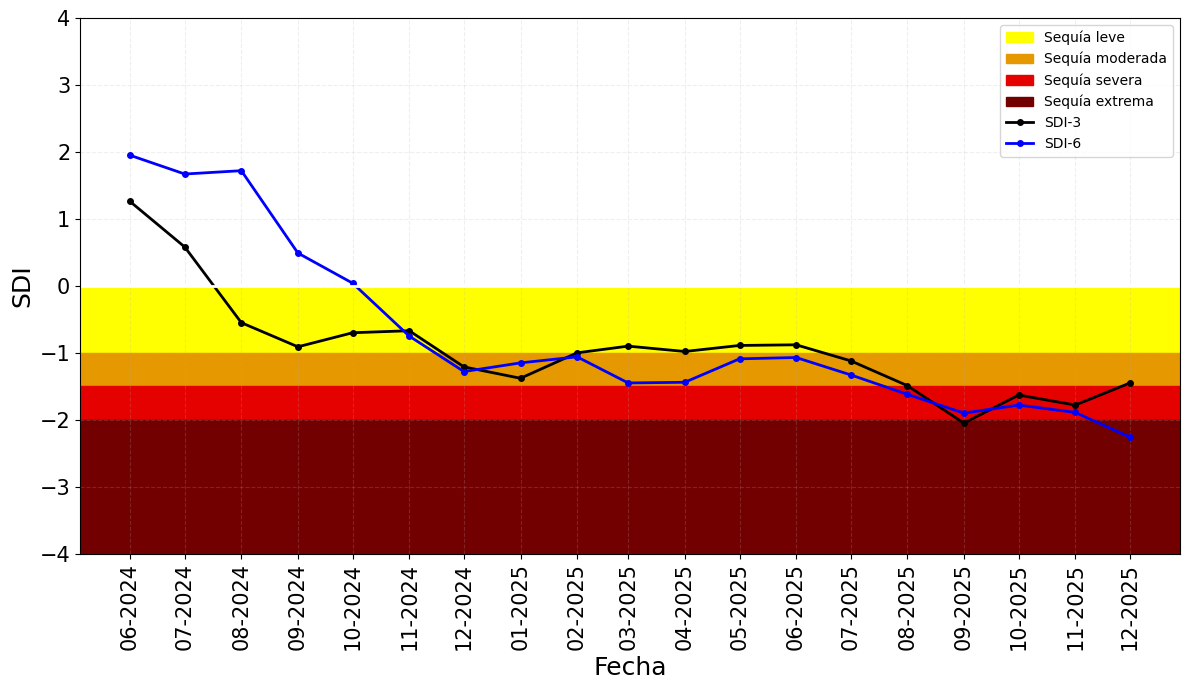

In [74]:
# Solo necesitas poner el código de la estación aquí
graficar_sdi_reciente("1330", escalas=[3, 6], meses_atras=18)